In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import colormaps as cmaps

In [2]:
df250 = pd.read_csv("./flux_selection_k250_n5000_N10.csv", index_col=0)
df2500 = pd.read_csv("./flux_selection_k2500_n5000_N10.csv", index_col=0)

print(df250.columns)
print(df2500.columns)

df250.drop(columns=['HMR_4546'], inplace=True)
df2500.drop(columns=['HMR_4546'], inplace=True)

df_2500_ = df2500.copy()
df_2500_['file_n'] = df_2500_['file_n'] + 16

df_combined = pd.concat([df250, df_2500_])



Index(['HMR_8436', 'HMR_3179', 'HMR_6021', 'HMR_1465', 'HMR_4546', 'label',
       'file_n'],
      dtype='object')
Index(['HMR_6021', 'HMR_1465', 'HMR_3179', 'HMR_8436', 'HMR_4546', 'label',
       'file_n'],
      dtype='object')


In [4]:
fluxes = df_combined.columns.difference(['label'])

flux_range = {
    flux: (df_combined[flux].min(), df_combined[flux].max())
    for flux in fluxes
}

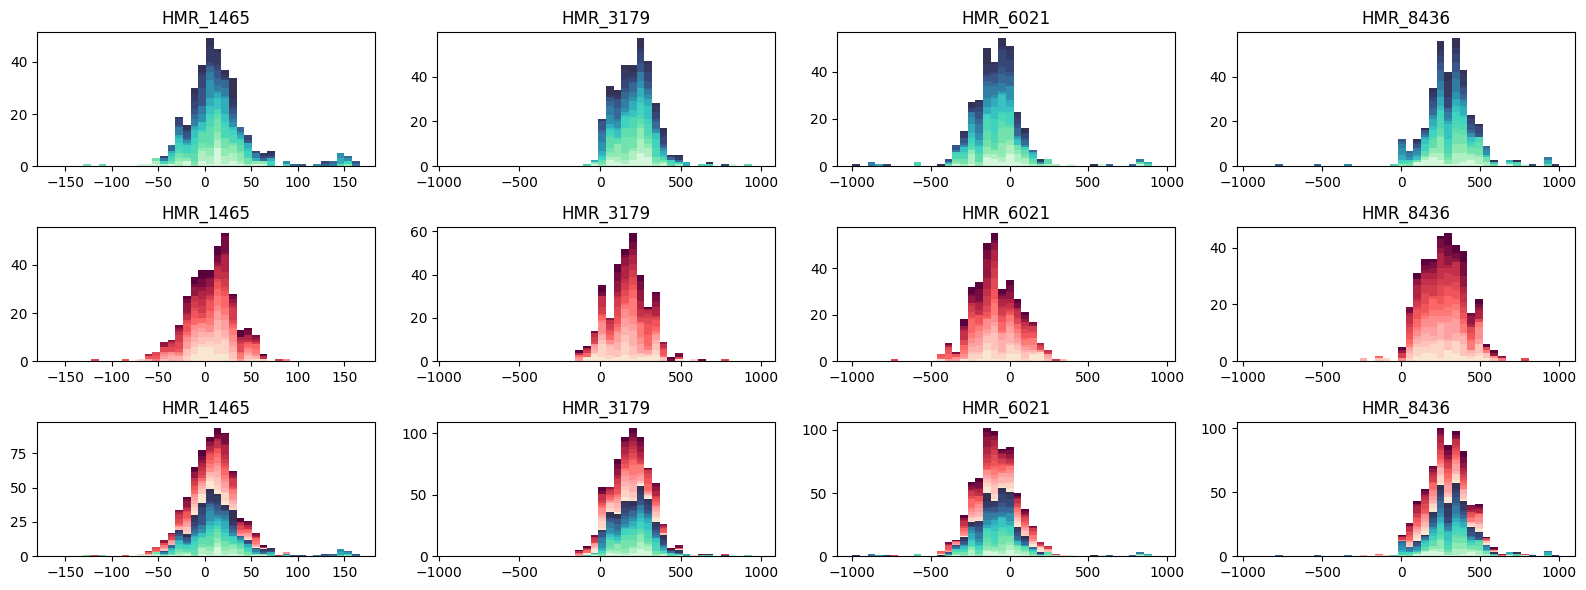

In [5]:

fig, (ax1, ax2, ax3) = plt.subplots(3, 4, figsize=(16, 6))

def hist(df, flux, ax, colors):
    ns = df['file_n'].unique()

    flux_values = None
    for n in ns:
        n_df = df[df['file_n'] == n][flux]
        values = n_df.values

        if flux_values is None:
            flux_values = np.array([values]).T
        else:
            new_length = min(flux_values.shape[0], len(values))
            flux_values = np.block([
                flux_values[:new_length,:], 
                values[:new_length,None]
            ])


    ax.hist(flux_values, 
            bins=40, 
            stacked=True, 
            range=flux_range[flux],
            color=colors)

    ax.set_title(flux)

def plot(df : pd.DataFrame, axs, colors):
    fluxes = flux_range.keys()
    for ax, flux in zip(axs, fluxes):
        hist(df, flux, ax, colors)

colors250 = cmaps.bl_11.discrete(16).colors
colors2500 = list(reversed(cmaps.fushia_red_pink1.discrete(16).colors))

plot(df250, ax1, colors250)
plot(df2500, ax2, colors2500)
plot(df_combined, ax3, list(colors250) + colors2500)

fig.tight_layout() 

plt.savefig("./sampling_histogram.png", dpi=400)

In [6]:
df250

,HMR_8436,HMR_3179,HMR_6021,HMR_1465,label,file_n
0,421.109776,75.377491,-360.437339,32.933380,liver_hepatocytes,0
1,278.283191,267.992968,-141.120873,6.742042,liver_hepatocytes,0
2,170.910517,249.436733,20.291674,-0.296426,liver_hepatocytes,0
3,255.349103,261.544438,23.729107,54.091712,liver_hepatocytes,0
4,796.260585,47.292121,601.049841,-70.013532,liver_hepatocytes,0
...,...,...,...,...,...,...
35193,296.508452,395.796304,-109.621650,23.555022,liver_hepatocytes,15
35194,370.812003,298.253806,-24.542271,28.903200,liver_hepatocytes,15
35195,319.452418,30.192287,-288.375120,5.533582,liver_hepatocytes,15
35196,161.595118,247.467870,61.951815,16.877781,liver_hepatocytes,15


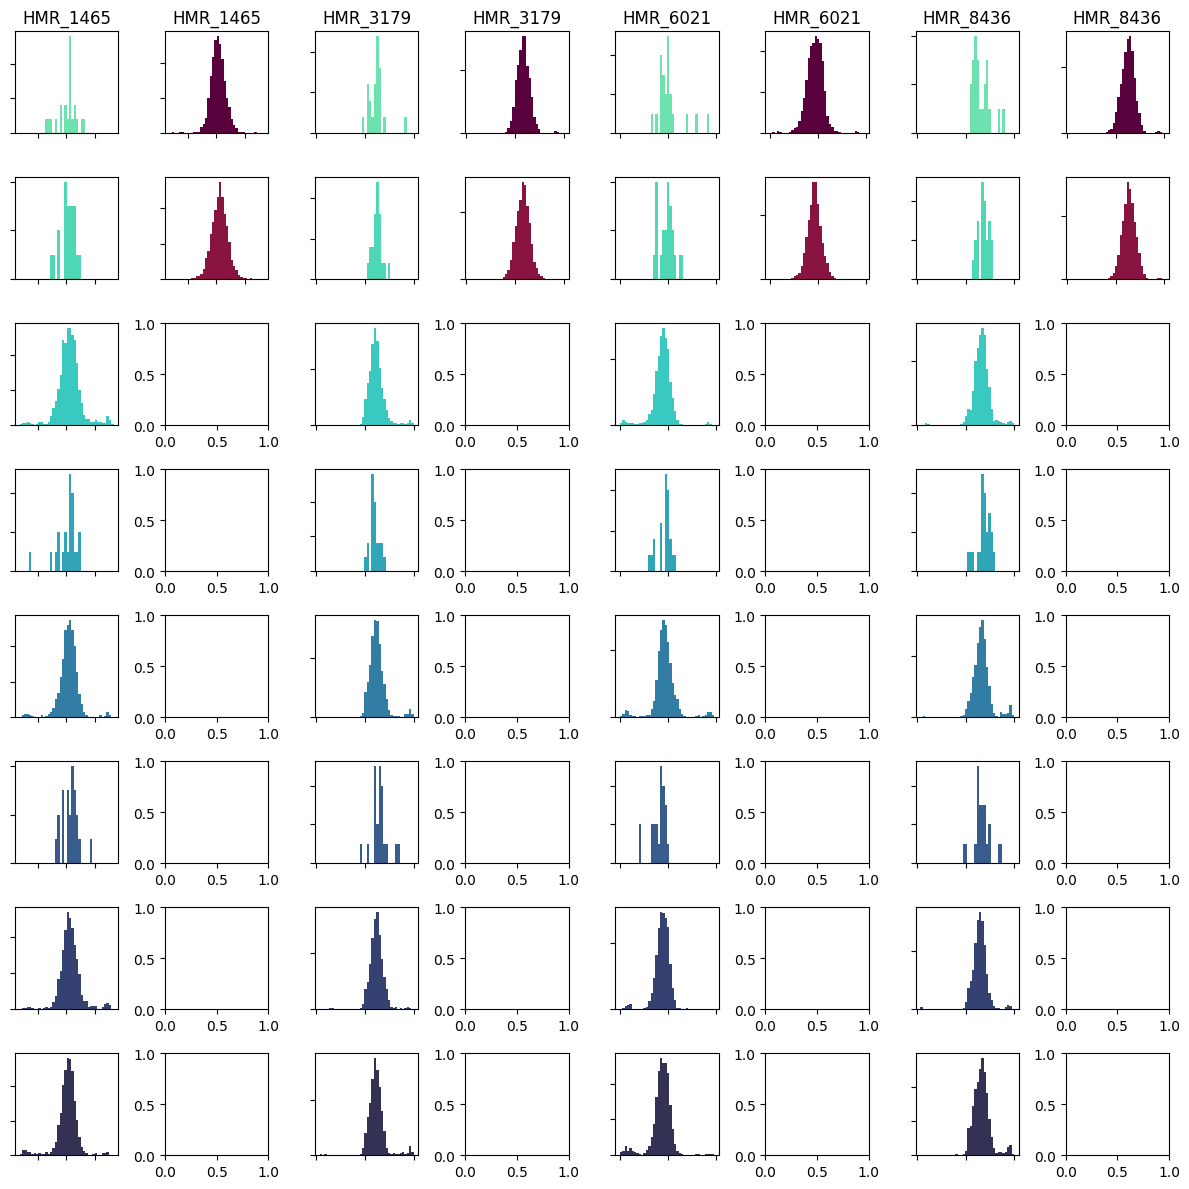

In [20]:
fig, axss = plt.subplots(8, 8, figsize=(12,12))

axs = sum([list(axs) for axs in axss], start=[])

colors250 = cmaps.bl_11.discrete(10).colors[2:]
colors2500 = cmaps.fushia_red_pink1.discrete(10).colors[:-2]

def plot(df, axs, color, ax_fn):
    for i,flux in enumerate(df.columns.difference(['label', 'file_n'])):
        ax_i = ax_fn(i)
        if ax_i >= len(axs):
            continue
        ax = axs[ax_i]
        ax.hist(df[flux], bins=40, range=flux_range[flux], color=color)
        ax.set_xticklabels([])
        ax.set_yticklabels([])

def split_dfs_by_file_n(df):
    return [
        df[df['file_n'] == fn]
        for fn in df['file_n'].unique()
    ]

def titles(axs, flux_fn):
    for i, ax in enumerate(axs):
        flux_i = flux_fn(i)
        if flux_i > len(fluxes):
            continue
        ax.set_title(fluxes[flux_i])


df250_split = split_dfs_by_file_n(df250)
df2500_split = split_dfs_by_file_n(df2500)

for df, axs, color in zip(df250_split, axss, colors250):
    plot(df, axs, color, lambda i: 2*i)
for df, axs, color in zip(df2500_split, axss, colors2500):
    plot(df, axs, color, lambda i: 2*i + 1)

titles(axss[0], lambda i: i // 2)

fig.tight_layout()
